In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Data from AutoScout24 (Kaggle Dataset)

In [2]:
df = pd.read_csv('autoscout24-germany-dataset.csv')

df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


### Calculate average power output of all cars sold each year

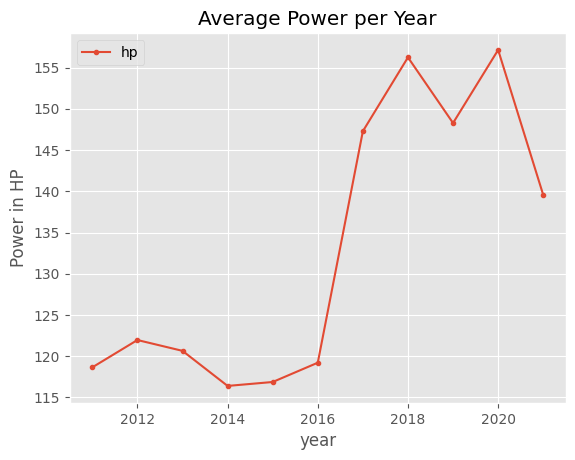

In [3]:
columns = ['hp', 'year']

plt.style.use('ggplot')

df[columns].groupby(by='year').mean().plot(style='.-', ylabel='Power in HP', title='Average Power per Year')

plt.show()

### Show distribution of gearbox types each year

In [13]:
crossed = pd.crosstab(df['gear'], df['year'], normalize='columns')

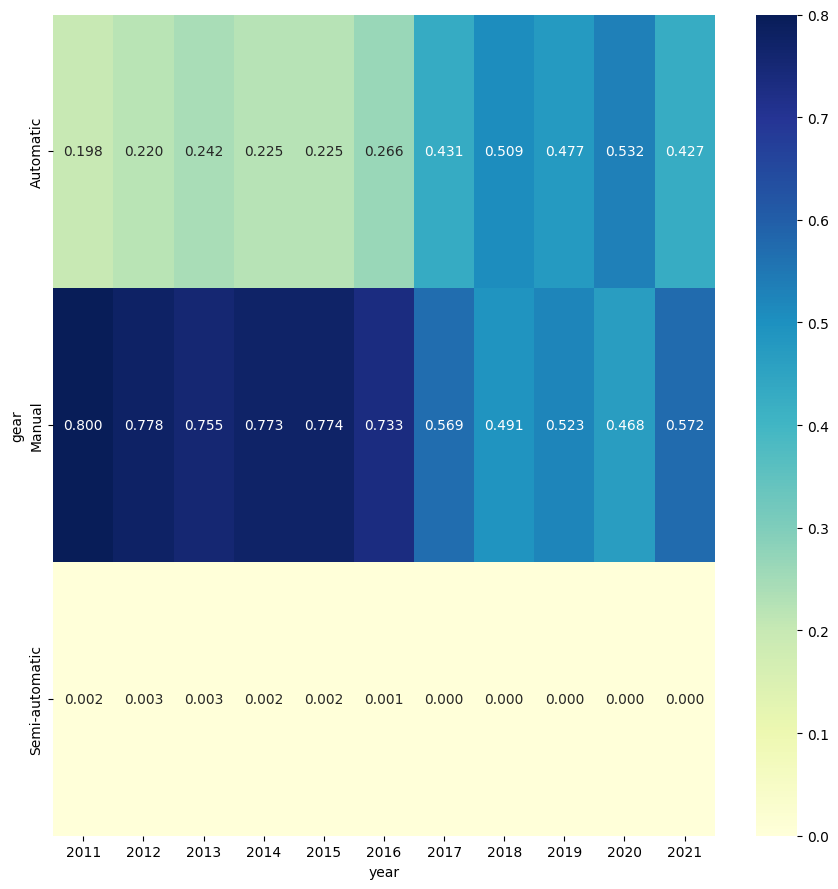

In [17]:
fig = plt.figure('Gearbox distribution by Year', figsize=(9, 9))
sns.heatmap(crossed, annot=True, fmt='.3f', cmap='YlGnBu')
plt.tight_layout()
plt.show()

### Show average mileage of brands with count above median (24)

In [6]:
df.make.value_counts().median()

24.0

In [7]:
columns = ['make', 'mileage']

df[columns].groupby(by='make').mean()

,mileage
make,
9ff,39500.000000
Abarth,25528.418605
Aixam,403.333333
Alfa,70702.265152
Alpina,45362.000000
...,...
Trucks-Lkw,312000.000000
Volkswagen,80802.309335
Volvo,67107.405473


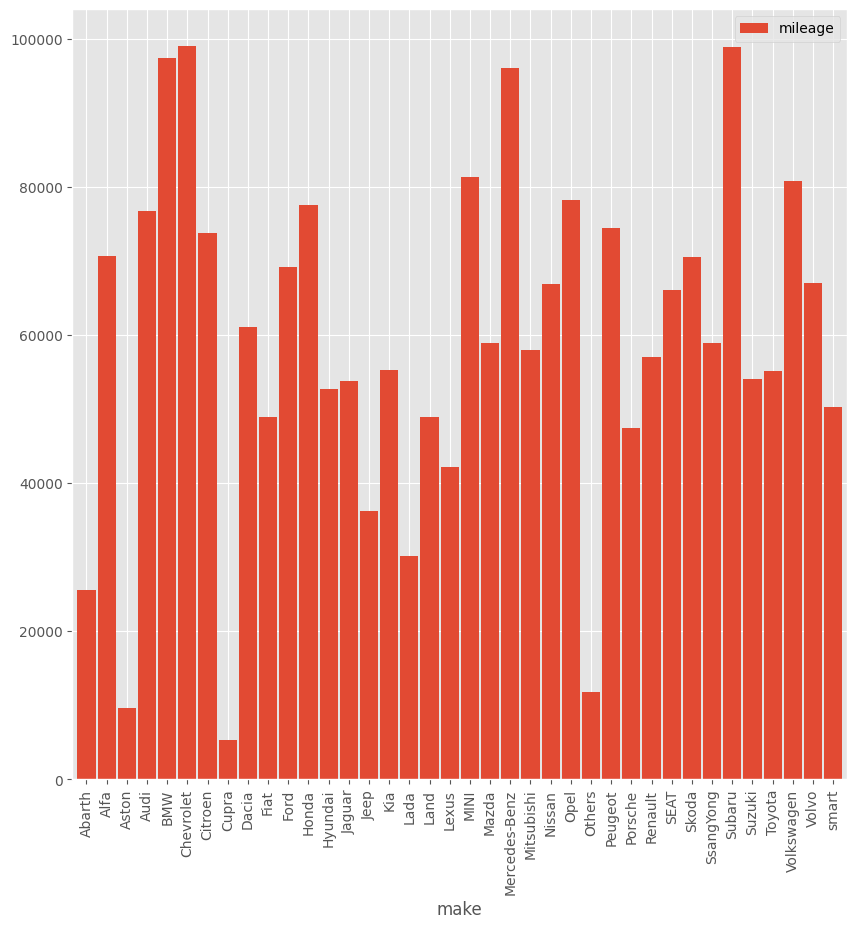

In [8]:
counts = df.make.value_counts()

df[df['make'].map(counts)>24][columns].groupby(by='make').mean().plot(kind='bar', figsize=(10, 10), width=0.9, mouseover=True)
plt.show()

### Price development of listed cars through the years

<Figure size 640x480 with 0 Axes>

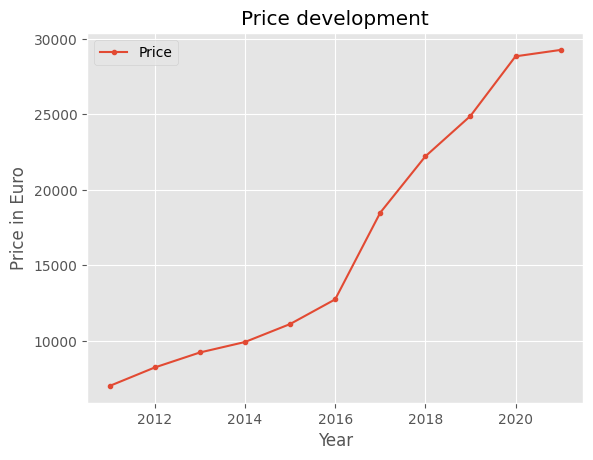

In [9]:
columns = ['price', 'year']

fig = plt.figure()
df[columns].groupby(by='year').mean().plot(ylabel='Price in Euro', title='Price development', xlabel='Year', style='.-')
plt.legend(['Price'])



plt.show()

### Count for each Porsche model listed

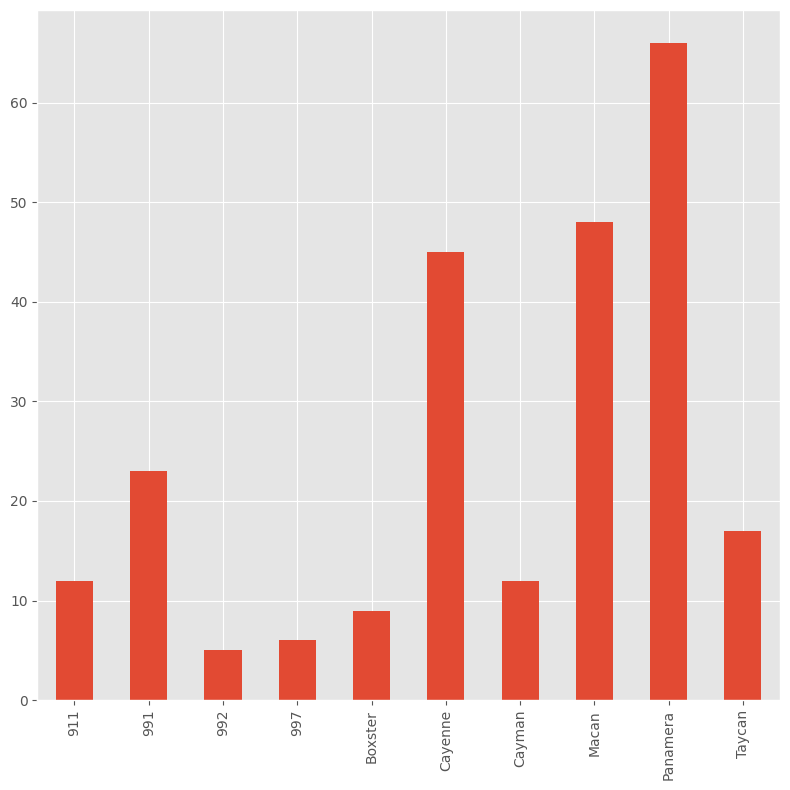

In [10]:
columns = ['make', 'model']

plt.style.use('ggplot')
df_new = df.loc[df.make == 'Porsche']

df_new.model.value_counts().sort_index().plot(kind='bar', figsize=(8, 8))
plt.tight_layout()

plt.show()

### Box plots for car mileage

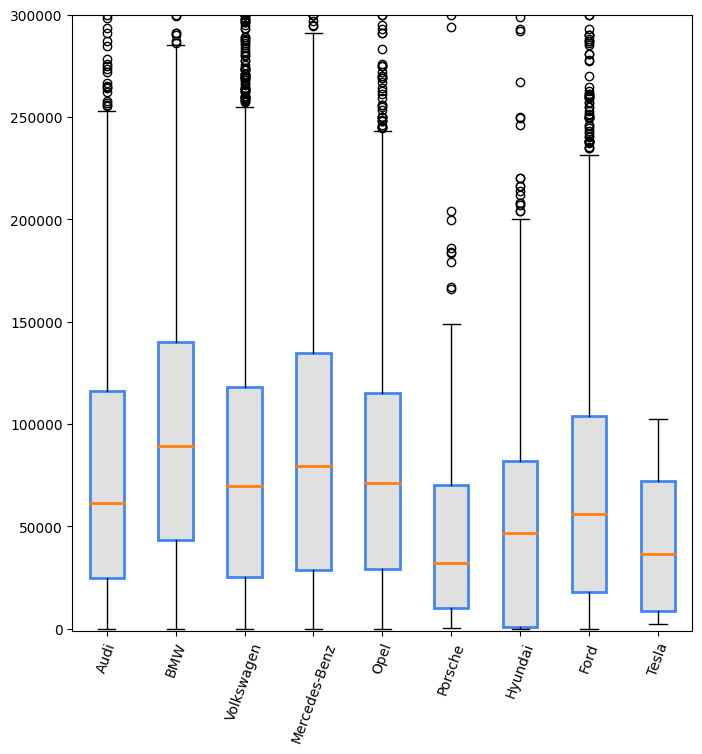

In [11]:
companies = ['Audi', 'BMW', 'Volkswagen', 'Mercedes-Benz', 'Opel', 'Porsche', 'Hyundai', 'Ford', 'Tesla']

audi = df.loc[df.make == 'Audi']['mileage']
bmw = df.loc[df.make == 'BMW']['mileage'].dropna()
vw = df.loc[df.make == 'Volkswagen']['mileage']
mercedes = df.loc[df.make == 'Mercedes-Benz']['mileage'].dropna()
opel = df.loc[df.make == 'Opel']['mileage'].dropna()
porsche = df.loc[df.make == 'Porsche']['mileage']
hyundai = df.loc[df.make == 'Hyundai']['mileage'].dropna()
ford = df.loc[df.make == 'Ford']['mileage'].dropna()
tesla = df.loc[df.make == 'Tesla']['mileage'].dropna()

plt.style.use('default')
plt.figure(figsize=(8,8))
boxes = plt.boxplot([audi, bmw, vw, mercedes, opel, porsche, hyundai, ford, tesla], labels=companies, 
                    patch_artist=True, medianprops={'linewidth': 2}, vert=1)

for box in boxes['boxes']:
    box.set(color='#4286f4', linewidth=2)
    box.set(facecolor='#e0e0e0')

plt.ylim(-1000, 300000)
plt.xticks(rotation=70)
plt.show()

In [12]:
np.sort(df.make.unique())

tesla.max()

102500